# Peptides

In [1]:
import os
from config import FILENAME
from config import DATAFOLDER, FIGUREFOLDER

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA

In [3]:
pd.options.display.max_columns = 100
pd.options.display.min_rows = 30

In [4]:
DATA_PEPTIDE_INTENSITIES = 'data/peptide_intensities.pkl'

peptides = pd.read_pickle(DATA_PEPTIDE_INTENSITIES)
peptides

Sequence,AAAAAAAAAAAAAAAGAGAGAK,AAAAAAAAAAAAAAATAASAAASAILGGR,AAAAAAAAAAAATGTEAGPGTAGGSENGSEVAAQPAGLSGPAEVGPGAVGER,AAAAAAAAAAGAAGGR,AAAAAAAAAAGAAGGRGSGPGR,AAAAAAAAAAGAAGGRGSGPGRR,AAAAAAAAAK,AAAAAAAAAPAAAATAPTTAATTAATAAQ,AAAAAAAAAVSR,AAAAAAAAGAFAGR,AAAAAAAGDSDSWDADAFSVEDPVR,AAAAAAAGDSDSWDADAFSVEDPVRK,AAAAAAAK,AAAAAAALESWQAAAPR,AAAAAAALQAK,AAAAAAAPSGGGGGGEEERLEEK,AAAAAAGAASGLPGPVAQGLK,AAAAAAGAGPEMVR,AAAAAAGAGPEMVRGQVFDVGPR,AAAAAAGEAR,AAAAAAGEARR,AAAAAAGPSPGSGPGDSPEGPEGEAPERR,AAAAAAGSGTPR,AAAAAAGSGTPREEEGPAGEAAASQPQAPTSVPGAR,AAAAAASAGSSASSGNQPPQELGLGELLEEFSR,AAAAAATAAAAASIR,AAAAAATAAAAASIRER,AAAAAATAAAAASIRERQTVALK,AAAAAATVLLR,AAAAAAVGPGAGGAGSAVPGGAGPCATVSVFPGAR,AAAAADLANR,AAAAADLANRSGESNTHQDIEEK,AAAAAEQQQFYLLLGNLLSPDNVVR,AAAAAEQQQFYLLLGNLLSPDNVVRK,AAAAAETPEVLRECGCK,AAAAAGAGSGPWAAQEK,AAAAAGLGGGGAGPGPEAGDFLAR,AAAAAGTATSQR,AAAAAGTATSQRFFQSFSDALIDEDPQAALEELTK,AAAAALSQQQSLQER,AAAAAMAEQESAR,AAAAAQGGGGGEPR,AAAAAQGGGGGEPRRTEGVGPGVPGEVEMVK,AAAAAQKQAK,AAAAASAAGPGGLVAGK,AAAAASAAGPGGLVAGKEEK,AAAAASAPQQLSDEELFSQLR,AAAAASAPQQLSDEELFSQLRR,AAAAASASQDELNQLER,AAAAASHLNLDALR,...,YYSFFDLNPK,YYSHVDYR,YYSIASSSK,YYSLDELSEK,YYSLWIPEQAR,YYSQPILVK,YYSSENTRPK,YYSSEYHYVGGFYGGCNEALMK,YYSSHYMTLVVQSK,YYSVNVPIQDGIQDEK,YYSYGLEK,YYTALYR,YYTEFPTVLDITAEDPSK,YYTGNYDQYVK,YYTGVVNNNEMVALQR,YYTGVVNNNEMVALQRDPNNPYDK,YYTLEEIQK,YYTLFGR,YYTLNGSK,YYTMHLTTLCNTSLDNPTQR,YYTPTISR,YYTPTISRER,YYTPVLAK,YYTPVPCESATAK,YYTRLGNDFHTNK,YYTSASGDEMVSLK,YYTSESK,YYTVFDR,YYTVFDRDNNR,YYTVFDRDNNRVGFAEAAR,YYTYMIMNK,YYVDVPQEEVPFR,YYVLNALK,YYVNSLQHR,YYVQLEQLK,YYVSGVDNK,YYVSPSDLLDDK,YYVTIIDAPGHR,YYVTIIDAPGHRDFIK,YYWGGQYTWDMAK,YYYAVVDCDSPETASK,YYYAVYDMVVR,YYYDGDMICK,YYYDGKDYIEFNKEIPAWVPFDPAAQITK,YYYECVLFVVR,YYYGNLIAVSNSFLAYAIR,YYYIPQYK,YYYQGCASWK,YYYVPADFVEYEK,YYYVQNVYTPVDEHVYPDHR
20180713_QE8_nLC5_ASD_QC_Hela1_peptides.txt,NaN,NaN,NaN,0.0,103770000.0,NaN,NaN,1.113700e+09,NaN,NaN,NaN,161350000.0,NaN,NaN,2.427700e+09,NaN,315150000.0,47772000.0,139290000.0,NaN,54774000.0,NaN,NaN,NaN,NaN,NaN,51638000.0,NaN,NaN,195040000.0,NaN,NaN,NaN,9.982000e+08,NaN,NaN,NaN,145420000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,171010000.0,NaN,70882000.0,NaN,NaN,NaN,NaN,69369000.0,NaN,NaN,NaN,NaN,92948000.0,59060000.0,NaN,NaN,0.0,147250000.0,NaN,NaN,104320000.0,39883000.0,NaN,32042000.0,190470000.0,1.207400e+09,NaN,NaN,NaN,109160000.0,NaN,NaN,NaN,NaN,NaN,NaN,21919000.0,8.215900e+08,1.428700e+10,NaN,NaN,NaN,NaN,NaN,NaN,5482200.0,NaN,NaN,NaN,NaN
20180713_QE8_nLC5_ASD_QC_Hela2_20190226172112_peptides.txt,18280000.0,NaN,NaN,23154000.0,92718000.0,NaN,NaN,1.021500e+09,NaN,NaN,NaN,133950000.0,NaN,NaN,3.002200e+09,NaN,261180000.0,NaN,101570000.0,69406000.0,56584000.0,NaN,NaN,NaN,NaN,NaN,56967000.0,NaN,NaN,132140000.0,NaN,NaN,34317000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14309000.0,NaN,NaN,NaN,NaN,NaN,NaN,109680000.0,NaN,NaN,NaN,NaN,103860000.0,121340000.0,NaN,NaN,110910000.0,242410000.0,NaN,NaN,124930000.0,NaN,NaN,NaN,575470000.0,1.408100e+09,NaN,NaN,NaN,164260000.0,NaN,NaN,166870000.0,NaN,NaN,NaN,NaN,1.123500e+09,1.874800e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75013000.0,26265000.0,NaN,NaN
20180713_QE8_nLC5_ASD_QC_Hela2_peptides.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_20190104110509_peptides.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.221000e+09,NaN,NaN,NaN,176000000.0,NaN,NaN,2.442400e+09,NaN,231780000.0,45597000.0,NaN,NaN,100090000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29533000.0,NaN,NaN,NaN,NaN,NaN,97363000.0,NaN,32325000.0,80621000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114170000.0,NaN,112690000.0,108990000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
X = peptides
INDEX_NAME = 'Sample ID'
X.index.name = INDEX_NAME

In [6]:
X.shape

(484, 193943)

In [7]:
N_MIN_OBS = 10
mask_min_obsevation = X.notna().sum() >= N_MIN_OBS
mask_min_obsevation.sum()

122552

## Peptitome is spares

In [8]:
def get_sorted_missing(X:pd.DataFrame):
    """Return a Dataframe with missing values. Order columns by degree of completness 
    over columns from variables least to most shared among observations."""
    X = X.notna().astype(int)
    return X[X.mean().sort_values().index]


In [9]:
missingness = get_sorted_missing(X)

In [10]:
missingness.head()

Sequence,IGDLFVASFSK,IPQDQAIPR,LVAEAASEPKEIIK,EREQGHQKER,DIPPTKMHMK,DIPNMLDVLK,LVAEEGGFAVVCK,TGELFYTLMEK,IPPVMWGFLR,TGELEVKNMDMKPGSTLK,LVAGQGCVGPR,LVAIFNLSR,EREQLMMILNK,TGEEVGFVVDAKTAGK,IPPSTPR,TGEELGFDYGDRFWDIK,TYLNHCELHR,IPPSFVKMVQVSR,LVALSCHGSR,LVAMAVK,LVAMGIPESLR,DIPENLDEQR,LVANQAMEAEQR,ERERGEK,IPPLNLGPPSFPHHR,TGEAETITSHYLFALGVYR,IPPHHPHTSR,ERESDTGK,DIPAPSPPLPLLSGVPPPPPLPPPPPIK,TGDTVVFK,DIPTNSPELEETLTHTITK,LVADFDLGKDVLPWLR,TYLLGTDLSIFK,WEESVLEPALEIVQSFIQGHKPTATPIK,LTWLHYLCTGEVKMNYLGK,IPSIEAGGLQDLIK,DIQLLKAYMRAIR,LTWPNADSKK,DIQIPMSFKAGHTTVDDKLK,ERELMQLQR,DIQHILWSWIVEMLS,LTWTYAANVGEHDLLK,WEDQENEIVQYGR,TYLDMNR,DIQFSPEDAQHGR,IPRCSWNR,LTYIDKWFLYK,LTYLNDMR,DIPAAILHAFLR,IPQVTTHWLEILQALLLSSNQELQHR,...,PFFHSLSEK,AILVDLEPGTMDSVR,SQIHDIVLVGGSTR,NTGIICTIGPASR,VHLVGIDIFTGK,IINEPTAAAIAYGLDK,VAPEEHPVLLTEAPLNPK,VLQATVVAVGSGSK,GSDFDCELR,MDDREDLVYQAK,TALIHDGLAR,AQIFANTVDNAR,IHFPLATYAPVISAEK,IVLQIDNAR,PMFIVNTNVPR,DLYANTVLSGGTTMYPGIADR,VMLGETNPADSKPGTIR,LHFFMPGFAPLTSR,SYELPDGQVITIGNER,LAVNMVPFPR,EGMNIVEAMER,DLEEDHACIPIK,LSLEGDHSTPPSAYGSVK,GILAADESTGSIAK,ALDVMVSTFHK,IIYGGSVTGATCK,HQGVMVGMGQK,THINIVVIGHVDSGK,IGGIGTVPVGR,VNQIGSVTESLQACK,LIAPVAEEEATVPNNK,TVTAMDVVYALK,RFDDAVVQSDMK,ESTLHLVLR,GYSFTTTAER,NQVAMNPTNTVFDAK,ALAAAGYDVEK,IISNASCTTNCLAPLAK,FGEVVDCTLK,TGTAEMSSILEER,IGAEVYHNLK,ITLDNAYMEK,LAQANGWGVMVSHR,TFIAIKPDGVQR,AGFAGDDAPR,YETELAMR,LMIEMDGTENK,ATAVMPDGQFK,EITALAPSTMK,EVDEQMLNVQNK
Sample ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20180713_QE8_nLC5_ASD_QC_Hela1_peptides.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
20180713_QE8_nLC5_ASD_QC_Hela2_20190226172112_peptides.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
20180713_QE8_nLC5_ASD_QC_Hela2_peptides.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_20190104110509_peptides.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
20190103_QE8_nLC0_LiNi_QC_MNT_15cm_Hela_01_peptides.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [11]:
missingness.iloc[:,150000:].shape

(484, 43943)

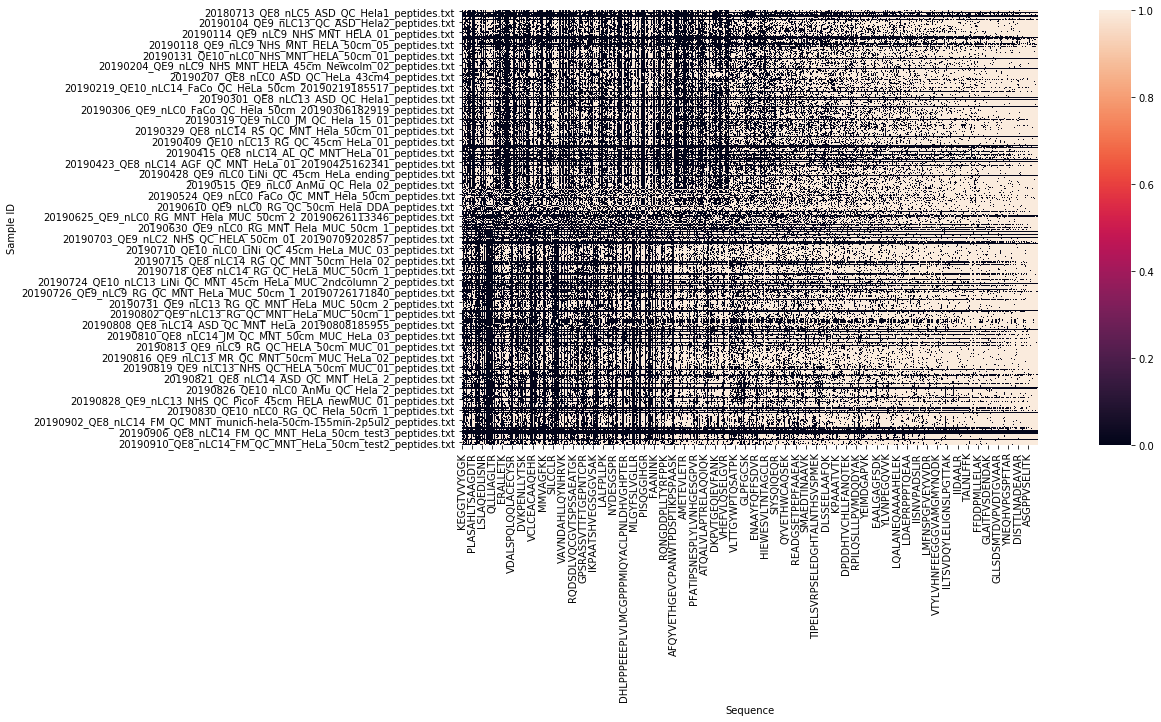

In [12]:
grid_kws = {"width_ratios": (.9, .05), "hspace": 0.5}
fig_heatmap_missing, (axes_heatmap_missing, cbar_ax) = plt.subplots(1, 2, gridspec_kw=grid_kws, figsize=(12,8))
axes_heatmap_missing = sns.heatmap(missingness.iloc[:,150000:], ax=axes_heatmap_missing,
                                   cbar_ax=cbar_ax,
                                   cbar_kws={"orientation": "vertical"})

In [13]:
# # This currently crashes if you want to have a pdf
from vaep.io_images import _savefig
_savefig(fig_heatmap_missing, 'peptides_heatmap_missing_4', folder=FIGUREFOLDER, pdf=False)

## Sample stats

In [14]:
TYPE = 'peptides'
COL_NO_MISSING, COL_NO_IDENTIFIED = f'no_missing_{TYPE}', f'no_identified_{TYPE}'
COL_PROP_SAMPLES = 'prop_samples'

def compute_stats_missing(X):
    """Dataset of repeated samples indicating if an observation
    has the variables observed or missing x\in\{0,1\}"""
    sample_stats = X.index.to_frame(index=False).reset_index()
    sample_stats.columns = ['SampleID_int', 'INDEX']
    sample_stats.set_index('INDEX', inplace=True)
    
    sample_stats[COL_NO_IDENTIFIED] = X.sum(axis=1)
    sample_stats[COL_NO_MISSING] = (X == 0).sum(axis=1)

    assert all(sample_stats[[COL_NO_IDENTIFIED, COL_NO_MISSING]].sum(axis=1) == X.shape[1])
    sample_stats = sample_stats.sort_values(by=COL_NO_IDENTIFIED, ascending=False)
    sample_stats[COL_PROP_SAMPLES] = np.array(range(1,len(sample_stats)+1)) / len(sample_stats)
    return sample_stats

sample_stats = compute_stats_missing(missingness)

In [15]:
sample_stats

,SampleID_int,no_identified_peptides,no_missing_peptides,prop_samples
INDEX,,,,
20190712_QE10_nLC0_LiNi_QC_45cm_HeLa_MUC_01_peptides.txt,269,53295,140648,0.002066
20190603_QE9_nLC0_FaCo_QC_MNT_Hela_50cm_20190603212753_peptides.txt,207,52357,141586,0.004132
20190712_QE10_nLC0_LiNi_QC_45cm_HeLa_MUC_01_20190713004325_peptides.txt,268,51236,142707,0.006198
20190521_QE9_nLC0_FaCo_QC_Hela_50cm_20190521181031_peptides.txt,199,50826,143117,0.008264
20190729_QE10_nLC0_LiNi_QC_45cm_HeLa_MUC_5thcolumn_2_peptides.txt,316,50786,143157,0.010331
20190819_QE10_nLC0_ASD_QC_45cm_HeLa_MUC_2_batch3_peptides.txt,395,50224,143719,0.012397
20190708_QE8_nLC14_FM_QC_MNT_50cm_Hela_01_peptides.txt,260,50005,143938,0.014463
20190619_QE8_nLC14_FaCo_QC_50cm_Hela_MUC_peptides.txt,219,49642,144301,0.016529
20190524_QE9_nLC0_FaCo_QC_MNT_Hela_50cm_peptides.txt,204,49637,144306,0.018595


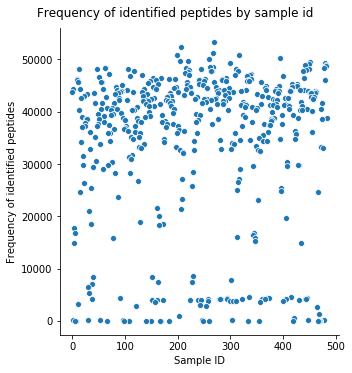

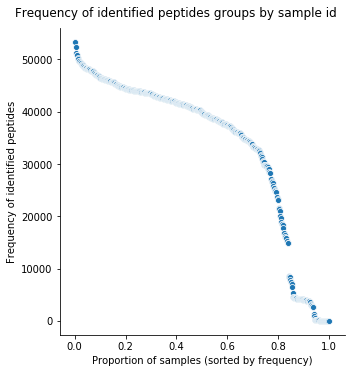

In [16]:
fig_ident_prot = sns.relplot(x='SampleID_int', y=COL_NO_IDENTIFIED, data=sample_stats) 
fig_ident_prot.set_axis_labels('Sample ID', f'Frequency of identified {TYPE}')
fig_ident_prot.fig.suptitle(f'Frequency of identified {TYPE} by sample id', y=1.03)
_savefig(fig_ident_prot, f'identified_{TYPE}_by_sample', folder=FIGUREFOLDER)

fig_ident_prot_dist = sns.relplot(x=COL_PROP_SAMPLES, y=COL_NO_IDENTIFIED, data=sample_stats)
fig_ident_prot_dist.set_axis_labels('Proportion of samples (sorted by frequency)', f'Frequency of identified {TYPE}')
fig_ident_prot_dist.fig.suptitle(f'Frequency of identified {TYPE} groups by sample id', y=1.03)
_savefig(fig_ident_prot_dist, f'identified_{TYPE}_ordered', folder=FIGUREFOLDER)

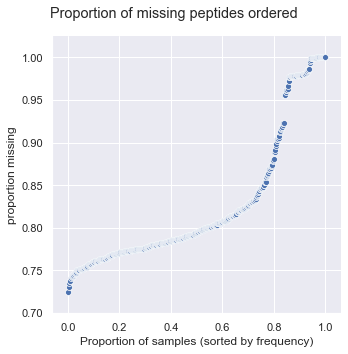

In [17]:
COL_NO_MISSING_PROP = COL_NO_MISSING + '_PROP'
sample_stats[COL_NO_MISSING_PROP]= sample_stats[COL_NO_MISSING] / float(X.shape[1])

# from ggplot import *
# ggplot(aes(x='nan_proc'), data = nonnan) + geom_histogram(binwidth = 0.005) #+ ylim(0,0.025)
sns.set(style="darkgrid")
g = sns.relplot(x='prop_samples', y=COL_NO_MISSING_PROP, data=sample_stats)
plt.subplots_adjust(top=0.9)
g.set_axis_labels("Proportion of samples (sorted by frequency)", "proportion missing")
g.fig.suptitle(f'Proportion of missing {TYPE} ordered')
_savefig(g, "proportion_proteins_missing", folder=FIGUREFOLDER)

## Look at sequences

In [18]:
class SequenceAnalyser():
    
    def __init__(self, sequences : pd.Series):
        if not isinstance(sequences, pd.Series):
            raise ValueError("Please provide a pandas.Series, not {}".format(type(sequences)))
        self.sequences = sequences
    
    def calc_counts(self,n_characters):
        return self.sequences.str[:n_characters].value_counts()
    
    def length(self):
        return self.sequences.str.len().sort_values()
    

In [19]:
sequences = SequenceAnalyser(peptides.columns.to_series())
sequences.length()

Sequence
VEECTLK                                                     7
VQVLEPR                                                     7
VWLQSEK                                                     7
TYEDLKR                                                     7
YDEPLGK                                                     7
TMIEDRK                                                     7
GLQVYIR                                                     7
VELSQLR                                                     7
DLGEIGR                                                     7
EMAGDNK                                                     7
LQQEWLK                                                     7
SGETSVR                                                     7
TYEDIDK                                                     7
VQVFLPR                                                     7
QVTGVTR                                                     7
                                                           ..

In [20]:
import ipywidgets as w
w.interact(sequences.calc_counts, n_characters=w.IntSlider(value=4, min=1, max=55))

interactive(children=(IntSlider(value=4, description='n_characters', max=55, min=1), Output()), _dom_classes=(…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [21]:
sequences_p4 = sequences.calc_counts(4)
display(sequences_p4.head())
sequences_p4.loc[sequences_p4.isin(('CON_','REV_'))].sort_index()

AAAA    117
ELEE     60
LLEE     59
LLEA     55
LEEE     54
Name: Sequence, dtype: int64

Series([], Name: Sequence, dtype: int64)

What to do when 


```
AAAAAAAAAAGAAGGRGSGPGR
AAAAAAAAAAGAAGGRGSGPGRR

AAAANSGSSLPLFDCPTWAGKPPPGLHLDVVK
AAAANSGSSLPLFDCPTWAGKPPPGLHLDVVKGDK
```



## Select Proteins

### Minumum required sample quality
First define the minum requirement of a sample to be kept in 

In [22]:
import ipywidgets as w
MIN_DEPTH_SAMPLE = 1500
w_min_depth_sample = w.IntSlider(value=MIN_DEPTH_SAMPLE, min=0, max=max(sample_stats[COL_NO_IDENTIFIED]))
print(f'Minimum {TYPE} per sample observed:')
w_min_depth_sample

Minimum peptides per sample observed:


IntSlider(value=1500, max=53295)

In [23]:
mask_samples = sample_stats[COL_NO_IDENTIFIED] >= w_min_depth_sample.value
print(f"Selected {mask_samples.sum()} samples")

Selected 454 samples


In [24]:
from vaep.data_handling import coverage
x_50 = coverage(X.loc[mask_samples], coverage_col=0.5, coverage_row=0.2)
# x_50_pca = log_z_zeroone_na(x_50) # there is a huge difference if NA is set to low value or mean!!
x_90 = coverage(X.loc[mask_samples], 0.9, 0.9)

In [25]:
x_50.shape, x_90.shape

((408, 22573), (388, 1730))

In [26]:
x_90.sample()

Sequence,AAAAAAALQAK,AAAEVAGQFVIK,AAAIGIDLGTTYSCVGVFQHGK,AAALEFLNRFEEAK,AADTIGYPVMIR,AAGTLYTYPENWR,AAIDWFDGK,AALQELLSK,AALTGLLHR,AASCVLLHTGQK,AATASAGAGGIDGKPR,AAVEEGIVLGGGCALLR,AAVPSGASTGIYEALELR,AAVPSGASTGIYEALELRDNDK,AAYLQETGKPLDETLK,ACANPAAGSVILLENLR,ACGLNFADLMAR,ACGNFGIPCELR,ACLDTAVENMPSLK,ADDGRPFPQVIK,ADEGISFR,ADKPDMGEIASFDK,ADLINNLGTIAK,ADLLLSTQPGREEGSPLELER,ADLTEYLSTHYK,ADRDESSPYAAMLAAQDVAQR,ADVQSIIGLQR,AEAESMYQIK,AEGPEVDVNLPK,AEGSDVANAVLDGADCIMLSGETAK,AEHDQLLLNYAK,AELNEFLTR,AFAHITGGGLLENIPR,AFAMIIDK,AFAMTNQILVEK,AFAVGVQQVLLK,AFGPGLQGGSAGSPAR,AFGYYGPLR,AFLADPSAFVAAAPVAAATTAAPAAAAAPAK,AFPMPGFDEH,AFVAIGDYNGHVGLGVK,AFVDFLSDEIK,AFYPEEISSMVLTK,AGAGSATLSMAYAGAR,AGAIAPCEVTVPAQNTGLGPEK,AGFAGDDAPR,AGGAAVVITEPEHTK,AGGEAGVTLGQPHLSR,AGGSASAMLQPLLDNQVGFK,AGKPVICATQMLESMIK,...,YAVLYQPLFDK,YDDMAAAMK,YDDMAACMK,YDDMATCMK,YDEMVESMK,YDGIILPGK,YEELQSLAGK,YETELAMR,YEWDVAEAR,YFLVGAGAIGCELLK,YFPTQALNFAFK,YGFIEGHVVIPR,YGTFMAPDLFGSK,YGVSGYPTLK,YGYEIPVDMLCK,YHTSQSGDEMTSLSEYVSR,YIDQEELNK,YISPDQLADLYK,YLAEFATGNDRK,YLAEVAAGDDKK,YLAEVACGDDRK,YLAIAPPIIK,YLDEDTIYHLQPSGR,YLIANATNPESK,YLIPNATQPESK,YLTAEAFGFK,YLTVAAVFR,YLYTLVITDK,YMACCLLYR,YNILGTNTIMDK,YPIEHGIITNWDDMEK,YPQLLPGIR,YQAVTATLEEK,YQEVTNNLEFAK,YQIDPDACFSAK,YRVPDVLVADPPIAR,YSHLQPGDHLTDITLK,YSLEPVAVELK,YSQVLANGLDNK,YSVQLLTPANLLAK,YTLPPGVDPTQVSSSLSPEGTLTVEAPMPK,YTPSGQAGAAASESLFVSNHAY,YTPVQQGPVGVNVTYGGDPIPK,YTVQDESHSEWVSCVR,YVDIAIPCNNK,YVVVTGITPTPLGEGK,YVWLVYEQDRPLK,YYPTEDVPRK,YYTSASGDEMVSLK,YYVTIIDAPGHR
Sample ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20190213_QE10_nLC0_KS_QC_MNT_HeLa_02_peptides.txt,1.314900e+09,73407000.0,115890000.0,1.206100e+09,NaN,989160000.0,745610000.0,1.755800e+09,98683000.0,378030000.0,208070000.0,1.569300e+09,489810000.0,6.248400e+09,389160000.0,2.150400e+09,139680000.0,284750000.0,461570000.0,2.339200e+09,2.729500e+09,5.313200e+09,5.361300e+09,1.778700e+09,188700000.0,986240000.0,402070000.0,1.194500e+09,1.017500e+09,256190000.0,185230000.0,965730000.0,239530000.0,784210000.0,482230000.0,381480000.0,767610000.0,740090000.0,204320000.0,180490000.0,200640000.0,1.125100e+09,1.332400e+09,491010000.0,1.890200e+09,1.224300e+10,86865000.0,88342000.0,666060000.0,5.341100e+09,...,679810000.0,681230000.0,592250000.0,216440000.0,206200000.0,574260000.0,1.768100e+09,1.302100e+09,233470000.0,663750000.0,2.584200e+09,653870000.0,208120000.0,609340000.0,433400000.0,2.042900e+09,2.983600e+09,5.886800e+09,1.500300e+09,770490000.0,1.125800e+09,189050000.0,330610000.0,807510000.0,848530000.0,705060000.0,1.204500e+09,712300000.0,598300000.0,1.056300e+09,2.809600e+09,64911000.0,1.165300e+09,421540000.0,780380000.0,54394000.0,606800000.0,2.087500e+09,765290000.0,434550000.0,1.727500e+09,576080000.0,1.378600e+09,713230000.0,0.0,476530000.0,695630000.0,1.087000e+09,418250000.0,447330000.0


### Distribution of Intensity values
- comparing non-transformed to $\log_{10}$ transformed

Sample ID: 478


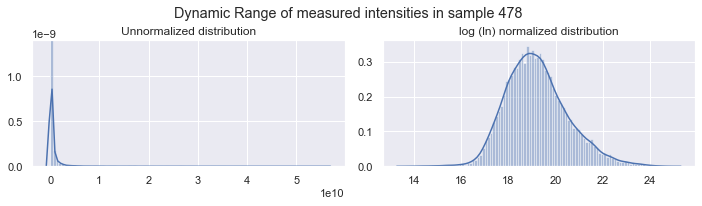

In [27]:
from vaep.transform import log
from random import sample
sample = x_50.sample()
sample_id = int(sample_stats.loc[sample.index].SampleID_int)
print("Sample ID:", sample_id)
sns.set(style="darkgrid")

fig, axes = plt.subplots(1,2, figsize=(10,3))
sns.distplot(sample, bins=100, ax=axes[0])
axes[0].set_title("Unnormalized distribution")

sample_log = log(sample) # natural logarithm, could also be base_2, base_10 logarithm
sns.distplot(sample_log, bins=100, ax=axes[1])
axes[1].set_title('log (ln) normalized distribution')

_ = fig.suptitle(f"Dynamic Range of measured intensities in sample {sample_id}")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
_savefig(fig, 'distribution_peptides_sample_' + str(sample_id))

Sample ID: IGQGYLIK


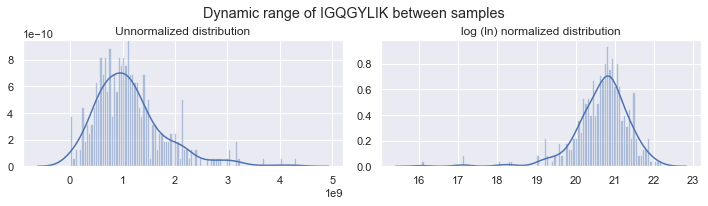

In [28]:
from vaep.transform import log
from random import sample
sample = x_50.sample(axis=1)
sample_id = sample.columns[0]
print("Sample ID:", sample_id)
sns.set(style="darkgrid")
fig, axes = plt.subplots(1,2, figsize=(10,3))
sns.distplot(sample, bins=100, ax=axes[0])
axes[0].set_title("Unnormalized distribution")

sample_log = log(sample) # natural logarithm, could also be base_2, base_10 logarithm
sns.distplot(sample_log, bins=100, ax=axes[1])
axes[1].set_title('log (ln) normalized distribution')

fig.suptitle(f"Dynamic range of {sample_id} between samples")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
_savefig(fig, 'distribution_peptides_sample_' + str(sample_id))

### Reference table intensities (natural logarithm)

14 to 23 spans a dynamic range of 3 orders of base 10

In [29]:
pd.set_option('precision', 2)

dynamic_range = pd.DataFrame(range(14, 24), columns=['x'])
dynamic_range['$e^x$'] = dynamic_range.x.apply(np.exp)
dynamic_range.set_index('x', inplace=True)
dynamic_range.index.name = ''
dynamic_range.T

,14,15,16,17,18,19,20,21,22,23
$e^x$,1.20e+06,3.27e+06,8.89e+06,2.42e+07,6.57e+07,1.78e+08,4.85e+08,1.32e+09,3.58e+09,9.74e+09


## Next UP

### Find Protein of Peptides
- check with some reference list of peptides